<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Differentiation in PyTorch</h1> 


<h2>Objective</h2><ul><li> How to perform differentiation in pytorch.</li></ul> 


<h2>Table of Contents</h2>

<p>In this lab, you will learn the basics of differentiation.</p> 

<ul>
    <li><a href="#Derivative">Derivatives</a></li>
    <li><a href="#Partial_Derivative">Partial Derivatives</a></li>
</ul>

<p>Estimated Time Needed: <strong>25 min</strong></p>
<hr>


<h2>Preparation</h2>


The following are the libraries we are going to use for this lab.


In [1]:
# These are the libraries will be useing for this lab.

import torch 
import matplotlib.pylab as plt


<!--Empty Space for separating topics-->


<a name="Derivative"><h2 id="Derivative">Derivatives</h2></a>


Let us create the tensor <code>x</code> and set the parameter <code>requires_grad</code> to true because you are going to take the derivative of the tensor.


In [2]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


Then let us create a tensor according to the equation $ y=x^2 $.


In [3]:
# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


Then let us take the derivative with respect x at x = 2


In [4]:
# Take the derivative. Try to print out the derivative at the value x = 2

y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


The preceding lines perform the following operation: 


$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$


$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$


In [5]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [6]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x0000020197A8CD90>
grad: None
is_leaf: False
requires_grad: True


C:\Users\User\AppData\Local\Temp\ipykernel_6392\1355624623.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print('grad:',y.grad)


Let us try to calculate the derivative for a more complicated function. 


In [7]:
# Calculate the y = x^2 + 2x + 1, then find the derivative 

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


The function is in the following form:
$y=x^{2}+2x+1$


The derivative is given by:


$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Determine the derivative of $ y = 2x^3+x $ at $x=1$


In [8]:
# Practice: Calculate the derivative of y = 2x^3 + x at x = 1

# Type your code here

Double-click <b>here</b> for the solution.
<!-- 
x = torch.tensor(1.0, requires_grad=True)
y = 2 * x ** 3 + x
y.backward()
print("The derivative result: ", x.grad)
 -->


<!--Empty Space for separating topics-->


 We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors


In [9]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

We can apply it the function  


In [10]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

<a name="Partial_Derivative"><h2 id="Partial_Derivative">Partial Derivatives</h2></a>


We can also calculate <b>Partial Derivatives</b>. Consider the function: $f(u,v)=vu+u^{2}$


Let us create <code>u</code> tensor, <code>v</code> tensor and  <code>f</code> tensor


In [11]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


This is equivalent to the following: 


$f(u=1,v=2)=(2)(1)+1^{2}=3$


<!--Empty Space for separating topics-->


Now let us take the derivative with respect to <code>u</code>:


In [12]:
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


the expression is given by:


$\frac{\mathrm{\partial f(u,v)}}{\partial {u}}=v+2u$

$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {u}}=2+2(1)=4$


<!--Empty Space for separating topics-->


Now, take the derivative with respect to <code>v</code>:


In [13]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(1.)


The equation is given by:


$\frac{\mathrm{\partial f(u,v)}}{\partial {v}}=u$

$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {v}}=1$


<!--Empty Space for separating topics-->


Calculate the derivative with respect to a function with multiple values as follows. You use the sum trick to produce a scalar valued function and then take the gradient: 


In [14]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

We can plot the function  and its derivative 


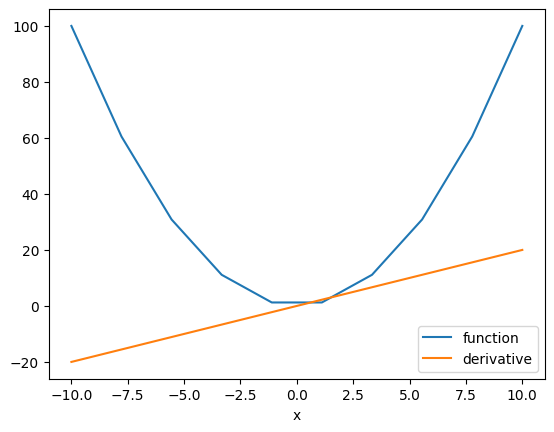

In [15]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

The orange line is the slope of the blue line at the intersection point, which is the derivative of the blue line.


The  method <code> detach()</code>  excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array. To understand the sum operation  <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html">Click Here</a>



<!--Empty Space for separating topics-->


The <b>relu</b> activation function is an essential function in neural networks. We can take the derivative as follows: 


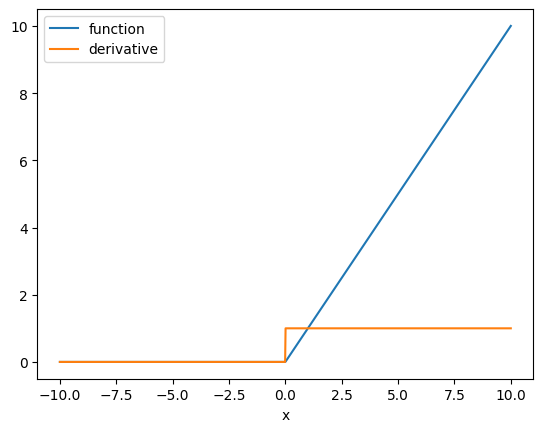

In [16]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


In [17]:
y.grad_fn

<h3>Practice</h3>


Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f=uv+(uv)^2$


In [18]:
# Practice: Calculate the derivative of f = u * v + (u * v) ** 2 at u = 2, v = 1

# Type the code here

Double-click __here__ for the solution.
<!-- 
u = torch.tensor(2.0, requires_grad = True)
v = torch.tensor(1.0, requires_grad = True)
f = u * v + (u * v) ** 2
f.backward()
print("The result is ", u.grad)
 -->


<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"></a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |

-->


<hr>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
